In [282]:
# Dependencies
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np
from pandas import DataFrame
from pandas import Series
import tweepy

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [283]:
# Save path to movies data file in a variable
data_file = "Resources/movie_data.csv"

# Use Pandas to read data
movie_df = pd.read_csv(data_file)
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,936662225.0,Documentary,...,NaN,NaN,NaN,NaN,306000000.0,2015.0,12.0,7.1,NaN,0


In [284]:
# Clean the data frame to remove the "Â" value in the movie title
%timeit movie_df.movie_title.apply(lambda x: x.replace('Â',''))

movie_df.head()

1.84 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,936662225.0,Documentary,...,NaN,NaN,NaN,NaN,306000000.0,2015.0,12.0,7.1,NaN,0


In [285]:
# remove rows where any of the columns are set to NaN
movie_df = movie_df.dropna(how='any')

movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [286]:
list(movie_df)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [287]:
# Create dataframe that is only starwars.
Dan_chart_df = movie_df.loc[:, ["movie_title", "movie_facebook_likes"]]
Dan_chart_df = movie_df[Dan_chart_df['movie_title'].str.contains("Star Wars")] 
Dan_chart_df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
236,Color,George Lucas,359.0,140.0,0.0,4000.0,Christopher Lee,20000.0,380262555.0,Action|Adventure|Fantasy|Sci-Fi,...,3286.0,English,USA,PG-13,113000000.0,2005.0,16000.0,7.6,2.35,10000
237,Color,George Lucas,284.0,142.0,0.0,4000.0,Christopher Lee,20000.0,310675583.0,Action|Adventure|Fantasy|Sci-Fi,...,3516.0,English,USA,PG,115000000.0,2002.0,16000.0,6.7,1.78,0
240,Color,George Lucas,320.0,136.0,0.0,1000.0,Liam Neeson,20000.0,474544677.0,Action|Adventure|Fantasy|Sci-Fi,...,3597.0,English,USA,PG,115000000.0,1999.0,14000.0,6.5,2.35,13000
1536,Color,Richard Marquand,197.0,134.0,37.0,504.0,Ian McDiarmid,11000.0,309125409.0,Action|Adventure|Fantasy|Sci-Fi,...,647.0,English,USA,PG,32500000.0,1983.0,1000.0,8.4,2.35,14000
2051,Color,Irvin Kershner,223.0,127.0,883.0,441.0,Kenny Baker,11000.0,290158751.0,Action|Adventure|Fantasy|Sci-Fi,...,900.0,English,USA,PG,18000000.0,1980.0,504.0,8.8,2.35,17000
3024,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,...,1470.0,English,USA,PG,11000000.0,1977.0,1000.0,8.7,2.35,33000


In [288]:
Dan_chart_df = movie_df.loc[:, ["movie_title", "movie_facebook_likes"]]
Dan_chart_df = movie_df[Dan_chart_df['movie_title'].str.contains("Star Trek")] 
Dan_chart_df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
48,Color,J.J. Abrams,590.0,132.0,14000.0,928.0,Bruce Greenwood,19000.0,228756232.0,Action|Adventure|Sci-Fi,...,1171.0,English,USA,PG-13,190000000.0,2013.0,981.0,7.8,2.35,92000
57,Color,Justin Lin,322.0,122.0,681.0,105.0,Melissa Roxburgh,998.0,130468626.0,Action|Adventure|Sci-Fi|Thriller,...,432.0,English,USA,PG-13,185000000.0,2016.0,119.0,7.5,2.35,30000
160,Color,J.J. Abrams,518.0,127.0,14000.0,981.0,Leonard Nimoy,26000.0,257704099.0,Action|Adventure|Sci-Fi,...,1559.0,English,USA,PG-13,150000000.0,2009.0,12000.0,8.0,2.35,19000
600,Color,Jonathan Frakes,160.0,103.0,906.0,748.0,Jonathan Frakes,1000.0,70117571.0,Action|Adventure|Sci-Fi|Thriller,...,515.0,English,USA,PG,58000000.0,1998.0,906.0,6.4,2.35,1000
778,Color,Stuart Baird,172.0,116.0,53.0,906.0,LeVar Burton,27000.0,43119879.0,Action|Adventure|Sci-Fi|Thriller,...,842.0,English,USA,PG-13,60000000.0,2002.0,1000.0,6.4,2.35,0
1067,Color,Jonathan Frakes,143.0,111.0,906.0,906.0,Alfre Woodard,1000.0,92001027.0,Action|Adventure|Drama|Sci-Fi|Thriller,...,286.0,English,USA,PG-13,45000000.0,1996.0,1000.0,7.6,2.35,3000
1343,Color,David Carson,98.0,118.0,18.0,906.0,Alan Ruck,1000.0,75668868.0,Action|Adventure|Mystery|Sci-Fi|Thriller,...,249.0,English,USA,PG,35000000.0,1994.0,946.0,6.6,2.35,0
1409,Color,Robert Wise,134.0,143.0,338.0,643.0,Nichelle Nichols,12000.0,82300000.0,Adventure|Mystery|Sci-Fi,...,405.0,English,USA,PG,35000000.0,1979.0,664.0,6.4,2.35,0
1631,Color,William Shatner,98.0,107.0,0.0,643.0,Nichelle Nichols,12000.0,55210049.0,Action|Adventure|Sci-Fi|Thriller,...,293.0,English,USA,PG,27800000.0,1989.0,664.0,5.4,2.35,0
1803,Color,Nicholas Meyer,112.0,110.0,120.0,664.0,Kurtwood Smith,12000.0,74888996.0,Action|Adventure|Sci-Fi|Thriller,...,188.0,English,USA,PG,30000000.0,1991.0,1000.0,7.2,2.35,0


In [289]:
Dan_chart_df = movie_df.loc[:, ["movie_title", "movie_facebook_likes"]]
Dan_chart_df = movie_df[Dan_chart_df['movie_title'].str.contains("Star Wars")] 
Dan_chart_df['movie_facebook_likes'] = Dan_chart_df['movie_facebook_likes']
just_fblikes = Dan_chart_df[[ "movie_title", "title_year", "movie_facebook_likes"]]
just_fblikes2 = just_fblikes.sort_values(by="movie_facebook_likes", ascending=False)
just_fblikes2.head(10)

    


/Users/danielevans/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,movie_title,title_year,movie_facebook_likes
3024,Star Wars: Episode IV - A New Hope,1977.0,33000
2051,Star Wars: Episode V - The Empire Strikes Back,1980.0,17000
1536,Star Wars: Episode VI - Return of the Jedi,1983.0,14000
240,Star Wars: Episode I - The Phantom Menace,1999.0,13000
236,Star Wars: Episode III - Revenge of the Sith,2005.0,10000
237,Star Wars: Episode II - Attack of the Clones,2002.0,0


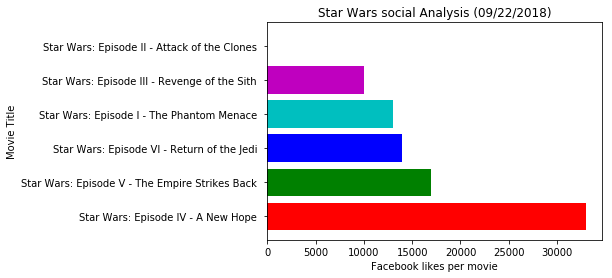

In [290]:
# Create bar chart for Starwars Franchise
movie_titles = just_fblikes2['movie_title']
movie_likes = just_fblikes2['movie_facebook_likes']

y_axis = np.arange(len(movie_titles))
x_axis = np.arange(len(movie_likes))

plt.barh(y_axis, movie_likes, color="rgbcm", align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, just_fblikes2['movie_title'])

# Get the current date for display
now = datetime.now()
now = now.strftime("%m/%d/%Y")

# Give our chart some labels and a tile
plt.title(f"Star Wars social Analysis ({now})")
plt.ylabel("Movie Title")
plt.xlabel("Facebook likes per movie")

# Save Figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

In [291]:
Dan_chart_df1 = movie_df.loc[:, ["movie_title", "movie_facebook_likes"]]
Dan_chart_df1 = movie_df[Dan_chart_df1['movie_title'].str.contains("Star Trek")] 
Dan_chart_df1['movie_facebook_likes'] = Dan_chart_df1['movie_facebook_likes']
just_fblikes1 = Dan_chart_df1[[ "movie_title", "title_year", "movie_facebook_likes"]]
just_fblikes3 = just_fblikes1.sort_values(by="movie_facebook_likes", ascending=False)
just_fblikes3.head(10)

/Users/danielevans/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,movie_title,title_year,movie_facebook_likes
48,Star Trek Into Darkness,2013.0,92000
57,Star Trek Beyond,2016.0,30000
160,Star Trek,2009.0,19000
1067,Star Trek: First Contact,1996.0,3000
600,Star Trek: Insurrection,1998.0,1000
778,Star Trek: Nemesis,2002.0,0
1343,Star Trek: Generations,1994.0,0
1409,Star Trek: The Motion Picture,1979.0,0
1631,Star Trek V: The Final Frontier,1989.0,0
1803,Star Trek VI: The Undiscovered Country,1991.0,0


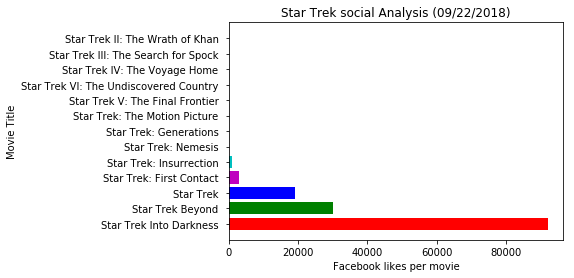

In [292]:
# Create bar chart for Starwars Franchise
movie_titles = just_fblikes3['movie_title']
movie_likes = just_fblikes3['movie_facebook_likes']

y_axis = np.arange(len(movie_titles))
x_axis = np.arange(len(movie_likes))

plt.barh(y_axis, movie_likes, color="rgbmc", align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, just_fblikes3['movie_title'])

# Get the current date for display
now = datetime.now()
now = now.strftime("%m/%d/%Y")

# Give our chart some labels and a tile
plt.title(f"Star Trek social Analysis ({now})")
plt.ylabel("Movie Title")
plt.xlabel("Facebook likes per movie")

# Save Figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

In [293]:
Dan_chart_df2 = movie_df.loc[:, ["movie_title", "movie_facebook_likes"]]
Dan_chart_df2 = movie_df[Dan_chart_df2['movie_title'].str.contains("Star Wars")] 
Dan_chart_df2['actor_1_facebook_likes'] = Dan_chart_df2['actor_1_facebook_likes']
just_fblikes = Dan_chart_df2[[ "movie_title", "title_year", "actor_1_name", "actor_1_facebook_likes"]]
just_fblikes2 = just_fblikes.sort_values(by="actor_1_facebook_likes", ascending=False)
just_fblikes2.head(10)

/Users/danielevans/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,movie_title,title_year,actor_1_name,actor_1_facebook_likes
236,Star Wars: Episode III - Revenge of the Sith,2005.0,Natalie Portman,20000.0
237,Star Wars: Episode II - Attack of the Clones,2002.0,Natalie Portman,20000.0
240,Star Wars: Episode I - The Phantom Menace,1999.0,Natalie Portman,20000.0
1536,Star Wars: Episode VI - Return of the Jedi,1983.0,Harrison Ford,11000.0
2051,Star Wars: Episode V - The Empire Strikes Back,1980.0,Harrison Ford,11000.0
3024,Star Wars: Episode IV - A New Hope,1977.0,Harrison Ford,11000.0


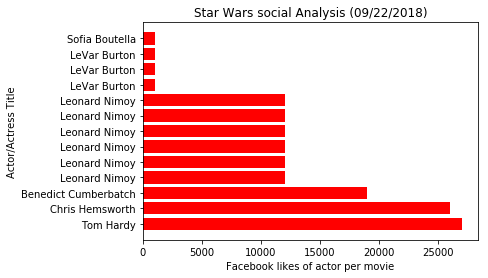

In [302]:
# Create bar chart for Starwars Franchise
movie_titles = just_fblikes2['actor_1_name']
movie_likes = just_fblikes2['actor_1_facebook_likes']

y_axis = np.arange(len(movie_titles))
x_axis = np.arange(len(movie_likes))

plt.barh(y_axis, movie_likes, color="r", align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, just_fblikes2['actor_1_name'])

# Get the current date for display
now = datetime.now()
now = now.strftime("%m/%d/%Y")

# Give our chart some labels and a tile
plt.title(f"Star Wars social Analysis ({now})")
plt.ylabel("Actor/Actress Title")
plt.xlabel("Facebook likes of actor per movie")

# Save Figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

In [295]:
Dan_chart_df3 = movie_df.loc[:, ["movie_title", "movie_facebook_likes"]]
Dan_chart_df3 = movie_df[Dan_chart_df3['movie_title'].str.contains("Star Trek")] 
Dan_chart_df3['actor_1_facebook_likes'] = Dan_chart_df3['actor_1_facebook_likes']
just_fblikes = Dan_chart_df3[[ "movie_title", "title_year", "actor_1_name", "actor_1_facebook_likes"]]
just_fblikes2 = just_fblikes.sort_values(by="actor_1_facebook_likes", ascending=False)
just_fblikes2.head(10)

/Users/danielevans/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,movie_title,title_year,actor_1_name,actor_1_facebook_likes
778,Star Trek: Nemesis,2002.0,Tom Hardy,27000.0
160,Star Trek,2009.0,Chris Hemsworth,26000.0
48,Star Trek Into Darkness,2013.0,Benedict Cumberbatch,19000.0
1409,Star Trek: The Motion Picture,1979.0,Leonard Nimoy,12000.0
1631,Star Trek V: The Final Frontier,1989.0,Leonard Nimoy,12000.0
1803,Star Trek VI: The Undiscovered Country,1991.0,Leonard Nimoy,12000.0
2018,Star Trek IV: The Voyage Home,1986.0,Leonard Nimoy,12000.0
2396,Star Trek III: The Search for Spock,1984.0,Leonard Nimoy,12000.0
2923,Star Trek II: The Wrath of Khan,1982.0,Leonard Nimoy,12000.0
600,Star Trek: Insurrection,1998.0,LeVar Burton,1000.0


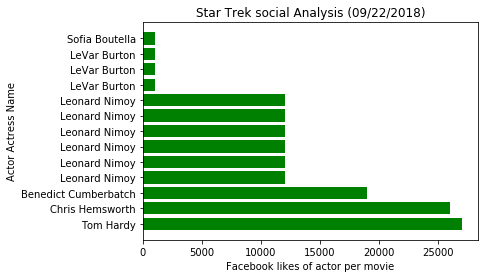

In [301]:
# Create bar chart for Starwars Franchise
movie_titles = just_fblikes2['actor_1_name']
movie_likes = just_fblikes2['actor_1_facebook_likes']

y_axis = np.arange(len(movie_titles))
x_axis = np.arange(len(movie_likes))

plt.barh(y_axis, movie_likes, color="g", align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, just_fblikes2['actor_1_name'])

# Get the current date for display
now = datetime.now()
now = now.strftime("%m/%d/%Y")

# Give our chart some labels and a tile
plt.title(f"Star Trek social Analysis ({now})")
plt.ylabel("Actor Actress Name")
plt.xlabel("Facebook likes of actor per movie")

# Save Figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

In [297]:
# Extract movie name, release date, budget and gross values
reduced_movie_df = movie_df.loc[:, ["movie_title", "budget", "gross","title_year"]]
reduced_movie_df

reduced_movie_df.head()

,movie_title,budget,gross,title_year
0,Avatar,237000000.0,760505847.0,2009.0
1,Pirates of the Caribbean: At World's End,300000000.0,309404152.0,2007.0
2,Spectre,245000000.0,200074175.0,2015.0
3,The Dark Knight Rises,250000000.0,448130642.0,2012.0
5,John Carter,263700000.0,73058679.0,2012.0


In [298]:
Dan_chart_df = movie_df.loc[:, ["movie_title", "movie_facebook_likes"]]
Dan_chart_df
Dan_chart_df.head()

,movie_title,movie_facebook_likes
0,Avatar,33000
1,Pirates of the Caribbean: At World's End,0
2,Spectre,85000
3,The Dark Knight Rises,164000
5,John Carter,24000


In [299]:
# Extract the Star Wars Movie information
starwars_df = reduced_movie_df[reduced_movie_df['movie_title'].str.contains("Star Wars")] 
starwars_df

starwars_df['budget'] = starwars_df['budget'].astype(float).map("${:,.2f}".format)
starwars_df['gross'] = starwars_df['gross'].astype(float).map("${:,.2f}".format)
starwars_df['title_year'] = starwars_df['title_year'].astype(int)

starwars_df.head(10)

/Users/danielevans/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/danielevans/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/danielevans/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

,movie_title,budget,gross,title_year
236,Star Wars: Episode III - Revenge of the Sith,"$113,000,000.00","$380,262,555.00",2005
237,Star Wars: Episode II - Attack of the Clones,"$115,000,000.00","$310,675,583.00",2002
240,Star Wars: Episode I - The Phantom Menace,"$115,000,000.00","$474,544,677.00",1999
1536,Star Wars: Episode VI - Return of the Jedi,"$32,500,000.00","$309,125,409.00",1983
2051,Star Wars: Episode V - The Empire Strikes Back,"$18,000,000.00","$290,158,751.00",1980
3024,Star Wars: Episode IV - A New Hope,"$11,000,000.00","$460,935,665.00",1977


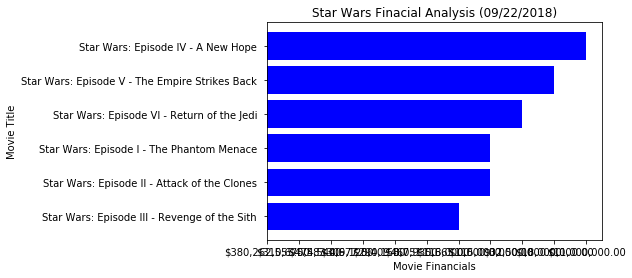

In [300]:
# Create bar chart for Starwars Franchise
movie_titles = starwars_df['movie_title']
movie_gross = starwars_df['gross']
movie_budget = starwars_df['budget']

y_axis = np.arange(len(movie_titles))
x_axis = np.arange(len(movie_gross))

plt.barh(y_axis, movie_gross, color="g", align="center")
plt.barh(y_axis, movie_budget, color="b", align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, starwars_df['movie_title'])

# Get the current date for display
now = datetime.now()
now = now.strftime("%m/%d/%Y")

# Give our chart some labels and a tile
plt.title(f"Star Wars Finacial Analysis ({now})")
plt.ylabel("Movie Title")
plt.xlabel("Movie Financials")

# Save Figure
plt.savefig("Fig1.png")

# Show plot
plt.show()